<a href="https://colab.research.google.com/github/aramsargsiann/Portfolio_2024/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [159]:
# Load California housing dataset and split into train and test sets
housing = fetch_california_housing()
train_data, test_data, train_labels, test_labels = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Convert data to PyTorch tensors
train_data = torch.FloatTensor(train_data)
test_data = torch.FloatTensor(test_data)
train_labels = torch.FloatTensor(train_labels)
test_labels = torch.FloatTensor(test_labels)

In [160]:
# Creat Model Class
class Model(nn.Module):
   # Define fully connected layers
    def __init__(self, inp_ft=housing.data.shape[1], hid1=64, hid2=32, out_ft=1):
        super().__init__()
        self.fc1 = nn.Linear(inp_ft, hid1)
        self.fc2 = nn.Linear(hid1, hid2)
        self.out = nn.Linear(hid2, out_ft)

         # Initialize weights using Xavier initialization
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.out.weight)


    def forward(self, x):
      # Forward pass through the network
      x = F.tanh(self.fc1(x))
      x = F.tanh(self.fc2(x))
      x = self.out(x)
      return x


In [161]:
# Instantiate the model
# Set random seed for reproducibility
torch.manual_seed(42)
model = Model()
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [162]:
# Training loop
losses = []
for i in range(300):
    train_pred = model.forward(train_data)
    loss = criterion(train_pred.squeeze(), train_labels)

    losses.append(loss.item())

    if i % 10 == 0:
        print(f'Epoch {i}: loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0: loss: 7.12867546081543
Epoch 10: loss: 0.8168593049049377
Epoch 20: loss: 0.6575875878334045
Epoch 30: loss: 0.5609360337257385
Epoch 40: loss: 0.5050013661384583
Epoch 50: loss: 0.4805251657962799
Epoch 60: loss: 0.4661058485507965
Epoch 70: loss: 0.4546436071395874
Epoch 80: loss: 0.44479942321777344
Epoch 90: loss: 0.43549805879592896
Epoch 100: loss: 0.4261016547679901
Epoch 110: loss: 0.4166116416454315
Epoch 120: loss: 0.4069407284259796
Epoch 130: loss: 0.3972865045070648
Epoch 140: loss: 0.3877680003643036
Epoch 150: loss: 0.3784501552581787
Epoch 160: loss: 0.36919721961021423
Epoch 170: loss: 0.3598179519176483
Epoch 180: loss: 0.35051965713500977
Epoch 190: loss: 0.34185051918029785
Epoch 200: loss: 0.33423301577568054
Epoch 210: loss: 0.3277575969696045
Epoch 220: loss: 0.32227805256843567
Epoch 230: loss: 0.31758153438568115
Epoch 240: loss: 0.313511461019516
Epoch 250: loss: 0.30995985865592957
Epoch 260: loss: 0.3068433701992035
Epoch 270: loss: 0.30406028032302

In [163]:
with torch.no_grad():
  test_eval = model.forward(test_data)
  loss = criterion(test_eval.squeeze(), test_labels)

loss

tensor(0.3100)

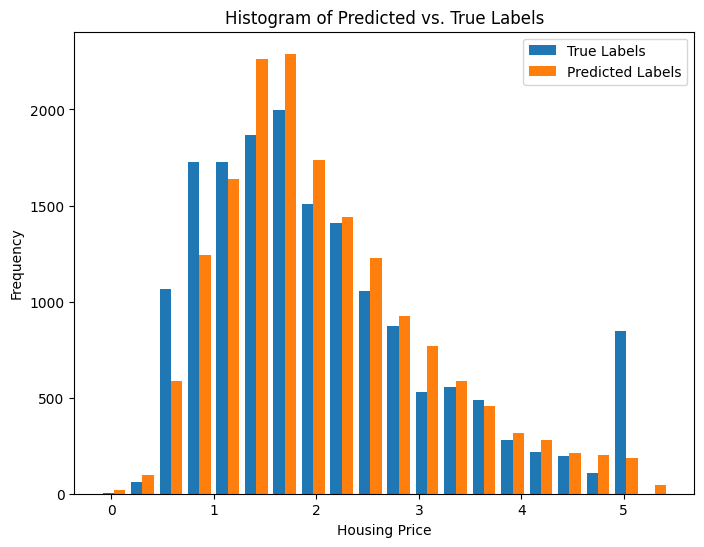

In [164]:
plt.figure(figsize=(8, 6))
plt.hist([train_labels.numpy(), train_pred.squeeze().detach().numpy()], bins=20, label=['True Labels', 'Predicted Labels'])
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted vs. True Labels')
plt.legend()
plt.show()

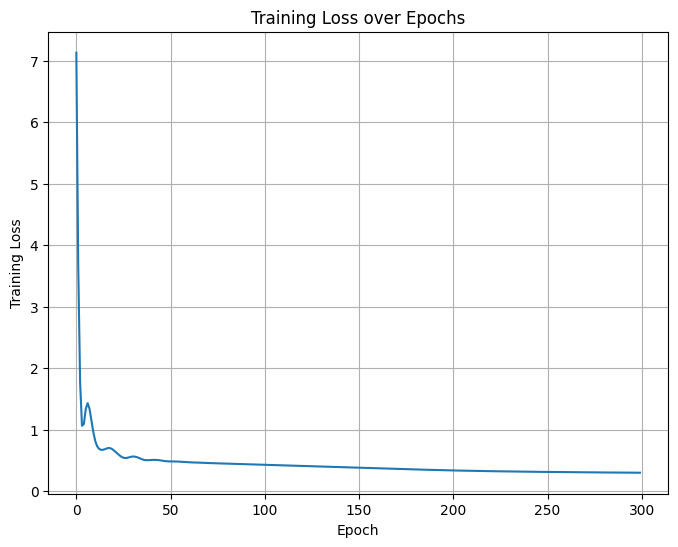

In [165]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()